<a href="https://colab.research.google.com/github/Andrew-Negrut/MachineLearning/blob/main/LogisticRegression(GD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [98]:
from sklearn.datasets import make_classification

In [99]:
x, y = make_classification(n_samples=100, n_features=2, n_redundant=0)

In [100]:
x = np.hstack((np.ones((x.shape[0], 1)), x))

In [101]:
colors = []
for i in range(100):
  if y[i] == 0:
    colors.append('red')
  else:
    colors.append('blue')

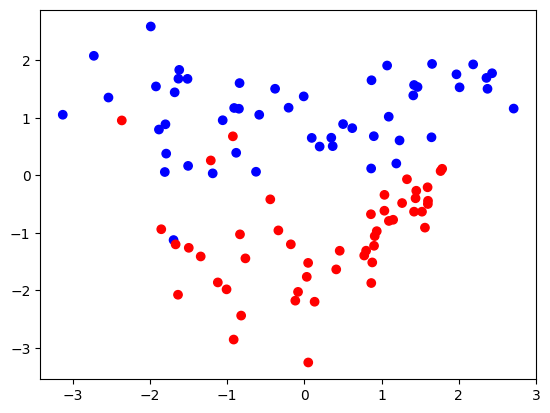

In [102]:
plt.scatter(x[:, 1], x[:, 2], c=colors)

In [103]:
def h_theta(theta, x):
  return 1 / (1 + math.exp(-1 * np.dot(theta, x)))

In [104]:
def likelihood(theta, x, y, m, n):
  res = 1
  for i in range(m):
    res *= (h_theta(theta, x[i, :]) ** y[i]) * ((1 - h_theta(theta, x[i, :]))
    ** (1 - y[i]))

  return res

In [105]:
def g_ascent(theta, x, y, m, n, alpha):
  for trial in range(1000):
    for i in range(m):
      theta_new = np.zeros(n)

      for j in range(n):
        theta_new[j] = theta[j] + alpha * x[i, j] * (y[i] -
                                                     h_theta(theta, x[i, :]))

      theta = theta_new.copy()

    print("Trial ", trial, " likelihood: ", likelihood(theta, x, y, m, n))

  return theta

In [106]:
theta = np.zeros(x.shape[1])

In [ ]:
theta_final = g_ascent(theta, x, y, x.shape[0], x.shape[1], 0.001)
theta_final

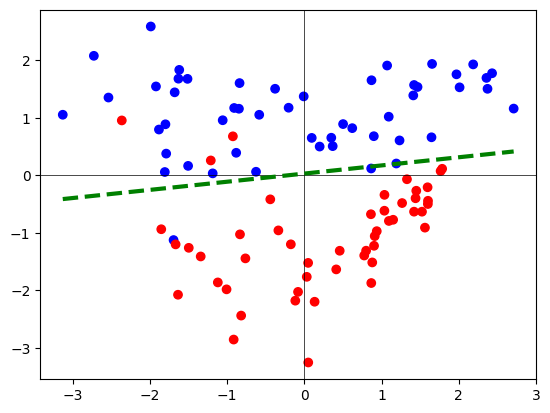

In [108]:
plt.scatter(x[:, 1], x[:, 2], c=colors)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

x1_inp = np.linspace(np.min(x[:, 1]), np.max(x[:, 1]))
plt.plot(x1_inp, ((-1 * theta_final[1] * x1_inp) / theta_final[2]) -
 (theta_final[0] / theta_final[2]), linestyle="dashed", linewidth=3, color='g')
plt.show()